([], [])

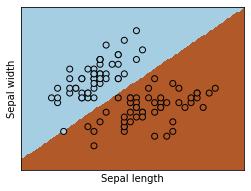

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def sigmoid(z): # sigmoid function
    return 1 / (1 + np.exp(-z)) #시그모이드 함수 구현 

def gradient(X, h, y): #x는 입력, h는 sigmoid, y는 정답값
    return np.dot(X.T, (h - y)) #x앞에 있는 W가 여기 곱해지면 되셌죠? #z =Wx+b이기에 X 곱해줌 


def linear_classification(X, y, theta, alpha, iters): 
    for i in range(iters):
        h = sigmoid(np.dot(X, theta)) #Wx+b 
        gradient_val = gradient(X, h, y)
        theta = theta - (gradient_val * alpha) #파라미터 
    return theta

# 실습에 활요할 데이터 불러오기
iris = datasets.load_iris()
X = iris.data[:100, 0:2]  # 앞에 있는 100개의 샘플만 사용, 앞에 있는 두개의 feature만 사용
y = np.array(iris.target)[:100] # 앞에 있는 100개의 샘플만 사용

# 입력 feature X= [X1, X2]를 X = [1, X1, X2]의 형태로 변환. 
# 이유: dot(X,theta) = dot([1, X1, X2], [theta_0, theta_1, theta_2])의 형태로 계산하기 위해
# 여기서 theta_0은 bias라고 보면됨
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  
# print(X.shape[0]) # 샘플의 개수
#np.ones 1 # 1차원 배열을 만들어줌



# 학습 파라미터 초기화
theta = np.zeros(X.shape[1])

# 하이퍼 파라미터 설정
alpha = 0.01 # learning rate
iterations = 10000 # 반복횟수

# linear classification 학습 실행
theta = linear_classification(X, y, theta, alpha, iterations)

# 여기 부터 아래에 있는 코드는 시각화 코드

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

test_in = np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = sigmoid(np.dot(test_in, theta)) # 테스트 실행
Z[Z>0.5] = 1 
Z[Z<0.5] = 0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
